In [195]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the data
data = pd.read_excel('/content/Dataset.xlsx')
data.head()

,Input Current (A),Error Rate (Defects),Calibration Data
0,0.00,0.832088,0
1,0.01,0.822885,0
2,0.02,0.743443,0
3,0.03,0.753390,0
4,0.04,0.961214,0


In [ ]:
# Converting labels from [0, 1] -> [-1, 1]
data['Calibration Data'] = data['Calibration Data'].apply(lambda x: -1 if x == 0 else 1)
data.head()

,Input Current (A),Error Rate (Defects),Calibration Data
0,0.00,0.832088,-1
1,0.01,0.822885,-1
2,0.02,0.743443,-1
3,0.03,0.753390,-1
4,0.04,0.961214,-1


In [178]:
# Creating class for SVM
class SVM():
    def __init__(self):
        self.W = None
        self.B = None
        self.C = 1.0
        self.alpha = 0.001 # Learning Rate

    def hinge_loss(self, y_true, y_pred):
        reg = 0.5 * np.linalg.norm(self.W)
        return reg + self.C * max(0, 1 - (y_pred*y_true))

def __get_loss(self, X, y):
    loss = 0
    for i in range(X.shape[0]):
        y_pred = np.dot(self.W, X[i]) + self.B
        loss += self.hinge_loss(y[i], y_pred)
    return loss

  def gradient_descent():
    pass

  def fit(self, X, y, batch_size=20, epochs=100):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape

    self.W = np.random.randn(n_features)
    self.B = 0

    indexes = np.arange(n_samples)
    np.random.shuffle(indexes)

    if len(X[0]) != 2:
        print("Expected 2 features...")
        return

    loss = []

    # Iterate epoch
    for epoch in range(epochs):

        rand_index = np.random.randint(0, n_samples)
        y_pred = np.dot(self.W, X[rand_index]) + self.B

        l = self.__get_loss(X, y) / n_samples
        loss.append(l)

        print(f"Epoch: {epoch+1} Loss: {l:.4f}")

      # Iterate over each sample
        for batch in range(0, n_samples, batch_size):
        gradw = 0
        gradb = 0

        for j in range(batch, batch+batch_size):
            if j < X.shape[0]:
                i = indexes[j]
                y_pred = y[i] * (np.dot(self.W, X[i].T) + self.B)

            if y_pred > 0:
                gradw += 0
                gradb += 0
            else:
                gradw += self.C * y[i] * X[i]
                gradb += self.C * y[i]

        # Update the weight and bias based on gradients
        self.W = self.W - self.alpha * self.W + self.alpha * gradw
        self.B = self.B + self.alpha * gradb

    return loss

In [179]:
svm_model = SVM()
loss = svm_model.fit(
    X = data[['Input Current (A)', 'Error Rate (Defects)']],
    y = data['Calibration Data'],
    # batch_size=20,
    epochs=1_000
)

Epoch: 1 Loss: 1.2509
Epoch: 2 Loss: 1.2692
Epoch: 3 Loss: 1.2884
Epoch: 4 Loss: 1.3078
Epoch: 5 Loss: 1.3260
Epoch: 6 Loss: 1.3391
Epoch: 7 Loss: 1.3466
Epoch: 8 Loss: 1.3519
Epoch: 9 Loss: 1.3557
Epoch: 10 Loss: 1.3561
Epoch: 11 Loss: 1.3559
Epoch: 12 Loss: 1.3543
Epoch: 13 Loss: 1.3521
Epoch: 14 Loss: 1.3490
Epoch: 15 Loss: 1.3450
Epoch: 16 Loss: 1.3410
Epoch: 17 Loss: 1.3371
Epoch: 18 Loss: 1.3340
Epoch: 19 Loss: 1.3301
Epoch: 20 Loss: 1.3262
Epoch: 21 Loss: 1.3224
Epoch: 22 Loss: 1.3192
Epoch: 23 Loss: 1.3154
Epoch: 24 Loss: 1.3123
Epoch: 25 Loss: 1.3085
Epoch: 26 Loss: 1.3047
Epoch: 27 Loss: 1.3016
Epoch: 28 Loss: 1.2979
Epoch: 29 Loss: 1.2939
Epoch: 30 Loss: 1.2906
Epoch: 31 Loss: 1.2873
Epoch: 32 Loss: 1.2834
Epoch: 33 Loss: 1.2801
Epoch: 34 Loss: 1.2768
Epoch: 35 Loss: 1.2735
Epoch: 36 Loss: 1.2702
Epoch: 37 Loss: 1.2669
Epoch: 38 Loss: 1.2637
Epoch: 39 Loss: 1.2604
Epoch: 40 Loss: 1.2572
Epoch: 41 Loss: 1.2540
Epoch: 42 Loss: 1.2508
Epoch: 43 Loss: 1.2476
Epoch: 44 Loss: 1.24

In [180]:
X = np.array(data[['Input Current (A)', 'Error Rate (Defects)']])
y = np.array(data['Calibration Data'])

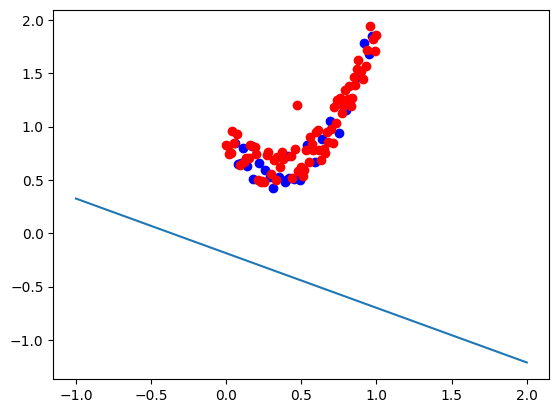

In [184]:
# Visualizing svm
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

X_pos = X[y==1]
X_neg = X[y==-1]

plt.scatter(X_pos[:, 0], X_pos[:, 1], color='blue', label='+ive class')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='-ive class')

yy = -(svm_model.W[0] / svm_model.W[1]) * xx - (svm_model.B/svm_model.W[1])

plt.plot(xx, yy, '-')

plt.show()

Since our support vector machine follows a linear path rather than the non-linear distribution of the data shown above, it was unable to fit the points very well.

### From Scikit Learn

In [198]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [203]:
clf = svm.SVC()
clf.fit(data[['Input Current (A)', 'Error Rate (Defects)']], data['Calibration Data'])

SVC()

In [204]:
y_pred = clf.predict(X)
print(y_pred.shape)

(101,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [205]:
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[73  0]
 [28  0]]


The svm was unable to perform well even in the above scenario because it frequently returns false positive results.
